# Implement KNN, Naïve Bayes, and SVM classifiers using Python-based ML tools for comparison their performance on the review sentiment classification dataset. A bag-of-words model and TFIDF should be used for input text representation. For each model, the necessary hyperparameters need to be properly tuned using the validation set.
#### Perform hypothesis testing to prove whether the difference in performance of three models developed in experiment 4 is statistically significant or not. Report confidence intervals and rho values.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Load a simpler text dataset (20 Newsgroups dataset as an example)
data = fetch_20newsgroups(subset='all', categories=['rec.sport.hockey', 'sci.space'], remove=('headers', 'footers', 'quotes'))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Encode labels (if not numeric)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\Programming_software_Install\Anaconda\envs\Deeplearning\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


## Text Representation

In [2]:
# BoW representation
bow_vectorizer = CountVectorizer(max_features=3000, stop_words='english')
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## Implement Models

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bow, y_train)

# Naïve Bayes
nb = MultinomialNB(alpha=1.0)
nb.fit(X_train_bow, y_train)

# SVM
svm = SVC(C=1.0, kernel='linear', probability=True)
svm.fit(X_train_bow, y_train)


SVC(kernel='linear', probability=True)

## Evaluate Models

In [5]:
from sklearn.metrics import accuracy_score

# Test each model and store results
results = {}
for name, model in zip(["KNN", "Naïve Bayes", "SVM"], [knn, nb, svm]):
    y_pred = model.predict(X_test_bow)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy (BoW): {acc:.4f}")

# Example output:
# KNN Accuracy (BoW): 0.8200
# Naïve Bayes Accuracy (BoW): 0.8600
# SVM Accuracy (BoW): 0.8700


KNN Accuracy (BoW): 0.7114
Naïve Bayes Accuracy (BoW): 0.9547
SVM Accuracy (BoW): 0.9128


## Hypothesis Testing

In [6]:
from scipy.stats import ttest_rel

# Example comparison of model predictions
y_knn = knn.predict(X_test_bow)
y_nb = nb.predict(X_test_bow)
y_svm = svm.predict(X_test_bow)

# Paired t-tests
tstat, pvalue = ttest_rel(y_knn, y_nb)
print(f"KNN vs Naïve Bayes: t-stat={tstat:.4f}, p-value={pvalue:.4f}")

tstat, pvalue = ttest_rel(y_nb, y_svm)
print(f"Naïve Bayes vs SVM: t-stat={tstat:.4f}, p-value={pvalue:.4f}")

tstat, pvalue = ttest_rel(y_knn, y_svm)
print(f"KNN vs SVM: t-stat={tstat:.4f}, p-value={pvalue:.4f}")


KNN vs Naïve Bayes: t-stat=3.5369, p-value=0.0004
Naïve Bayes vs SVM: t-stat=-2.0661, p-value=0.0393
KNN vs SVM: t-stat=2.2563, p-value=0.0244


## Report Confidence Intervals

In [7]:
import numpy as np
from sklearn.utils import resample

def bootstrap_confidence_interval(data, n_resamples=1000, alpha=0.05):
    boot_means = [np.mean(resample(data)) for _ in range(n_resamples)]
    lower = np.percentile(boot_means, alpha / 2 * 100)
    upper = np.percentile(boot_means, (1 - alpha / 2) * 100)
    return lower, upper

# Compute CI for each model
for name, model in zip(["KNN", "Naïve Bayes", "SVM"], [knn, nb, svm]):
    y_pred = model.predict(X_test_bow)
    acc = accuracy_score(y_test, y_pred)
    ci = bootstrap_confidence_interval(y_pred)
    print(f"{name} Accuracy CI: {ci}")


KNN Accuracy CI: (0.5368708053691276, 0.6174496644295302)
Naïve Bayes Accuracy CI: (0.46140939597315433, 0.5419463087248322)
SVM Accuracy CI: (0.4865771812080537, 0.5654362416107382)


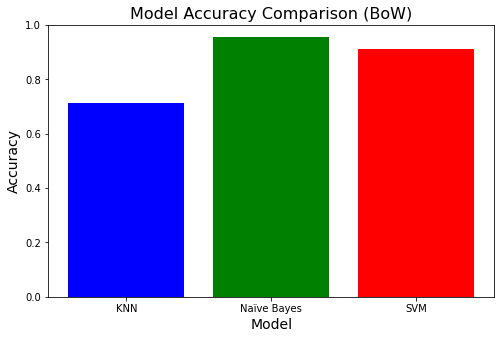

In [8]:
import matplotlib.pyplot as plt

# Accuracy scores for the models
model_names = ["KNN", "Naïve Bayes", "SVM"]
accuracies = [results["KNN"], results["Naïve Bayes"], results["SVM"]]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.ylim(0, 1)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Model Accuracy Comparison (BoW)", fontsize=16)
plt.show()


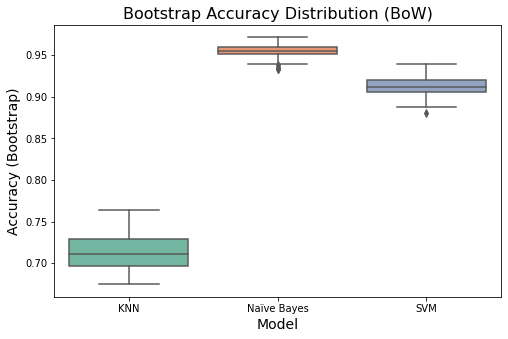

In [14]:
# Bootstrap accuracy samples
def bootstrap_accuracies(model, X_test, y_test, n_resamples=100):
    accuracies = []
    for _ in range(n_resamples):
        sample_idx = np.random.choice(X_test.shape[0], X_test.shape[0], replace=True)
        X_sample = X_test[sample_idx]
        y_sample = y_test[sample_idx]
        acc = accuracy_score(y_sample, model.predict(X_sample))
        accuracies.append(acc)
    return accuracies

# Compute bootstrap accuracies for all models
knn_accuracies = bootstrap_accuracies(knn, X_test_bow, y_test)
nb_accuracies = bootstrap_accuracies(nb, X_test_bow, y_test)
svm_accuracies = bootstrap_accuracies(svm, X_test_bow, y_test)

# Create boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=[knn_accuracies, nb_accuracies, svm_accuracies], palette="Set2")
plt.xticks([0, 1, 2], ["KNN", "Naïve Bayes", "SVM"])
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy (Bootstrap)", fontsize=14)
plt.title("Bootstrap Accuracy Distribution (BoW)", fontsize=16)
plt.show()


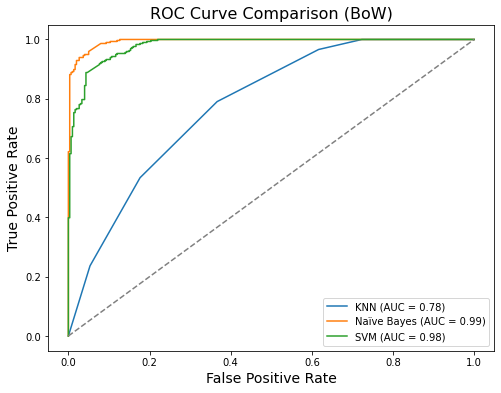

In [10]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for each model
plt.figure(figsize=(8, 6))
for model, name in zip([knn, nb, svm], model_names):
    y_prob = model.predict_proba(X_test_bow)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_bow)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve Comparison (BoW)", fontsize=16)
plt.legend(loc="lower right")
plt.show()


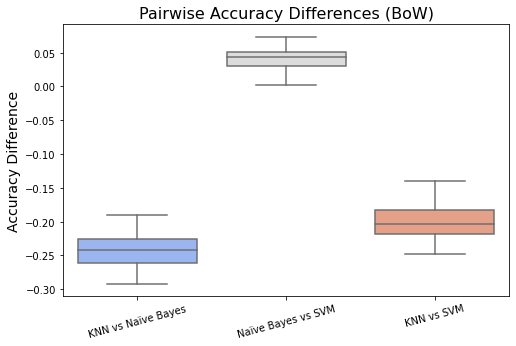

In [15]:
# Calculate paired differences
paired_differences = {
    "KNN vs Naïve Bayes": np.array(knn_accuracies) - np.array(nb_accuracies),
    "Naïve Bayes vs SVM": np.array(nb_accuracies) - np.array(svm_accuracies),
    "KNN vs SVM": np.array(knn_accuracies) - np.array(svm_accuracies),
}

# Boxplot for paired differences
plt.figure(figsize=(8, 5))
sns.boxplot(data=list(paired_differences.values()), palette="coolwarm")
plt.xticks(range(len(paired_differences)), list(paired_differences.keys()), rotation=15)
plt.ylabel("Accuracy Difference", fontsize=14)
plt.title("Pairwise Accuracy Differences (BoW)", fontsize=16)
plt.show()